## Hierarchial clustering of genomes vectorized using dna2vec embedding

Vectorisation of a genome using average embedding vectors for 8-grams

Phylogenic tree is a dendrogrm of hierarchical clustering of genomes (I think :)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../mylib/")

from genomic import sequence
from genomic.sequence import regex_filter, count_filter
from functools import partial
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


### Load Data

In [93]:
filters=[partial(regex_filter, rx="Bacillus"),partial(regex_filter,rx="massilioanorexius", keep=False),
         partial(count_filter, max_count=599)]
data = sequence.Dna2VecList.from_folder("/data/genomes/GenSeq_fastas/train",filters=filters,agg=partial(np.mean, axis=0),n_cpus=7)
processors = [
    sequence.GSFileProcessor(),
    sequence.GSTokenizeProcessor(tokenizer=sequence.GSTokenizer(ngram=8, skip=-7, n_cpus=7)),
    sequence.Dna2VecProcessor()]
%time for p in processors: p.process(data)

CPU times: user 1min 35s, sys: 3.87 s, total: 1min 39s
Wall time: 1min 47s


In [97]:
len(data.items)

1012

In [84]:
data.descriptions

['NZ_ABFU01000138.1 Bacillus coahuilensis m4-4 1955101000138, whole genome shotgun sequence',
 'NZ_ABFU01000137.1 Bacillus coahuilensis m4-4 1955101000137, whole genome shotgun sequence',
 'NZ_ABFU01000136.1 Bacillus coahuilensis m4-4 1955101000136, whole genome shotgun sequence',
 'NZ_ABFU01000135.1 Bacillus coahuilensis m4-4 1955101000135, whole genome shotgun sequence',
 'NZ_ABFU01000134.1 Bacillus coahuilensis m4-4 1955101000134, whole genome shotgun sequence',
 'NZ_ABFU01000133.1 Bacillus coahuilensis m4-4 1955101000133, whole genome shotgun sequence',
 'NZ_ABFU01000132.1 Bacillus coahuilensis m4-4 1955101000132, whole genome shotgun sequence',
 'NZ_ABFU01000131.1 Bacillus coahuilensis m4-4 1955101000131, whole genome shotgun sequence',
 'NZ_ABFU01000130.1 Bacillus coahuilensis m4-4 1955101000130, whole genome shotgun sequence',
 'NZ_ABFU01000129.1 Bacillus coahuilensis m4-4 1955101000129, whole genome shotgun sequence',
 'NZ_ABFU01000128.1 Bacillus coahuilensis m4-4 1955101000128

### Create Dendrogram

In [101]:
def log_scale(X):
    x=np.asarray(X);e=1e-6
    return np.log10(x+np.abs(x.min())+e) 


x=np.asarray(data.items)
bad_fastas = np.where(np.mean(x,axis=1) == 0.)[0]
X = np.delete(x, bad_fastas,0)
labelList=[" ".join(i.split()[2]) for i in data.descriptions]
labelList=np.delete(np.asarray(labelList), bad_fastas)
y=labelList

X_df=pd.DataFrame(data=log_scale(X), index=labelList)

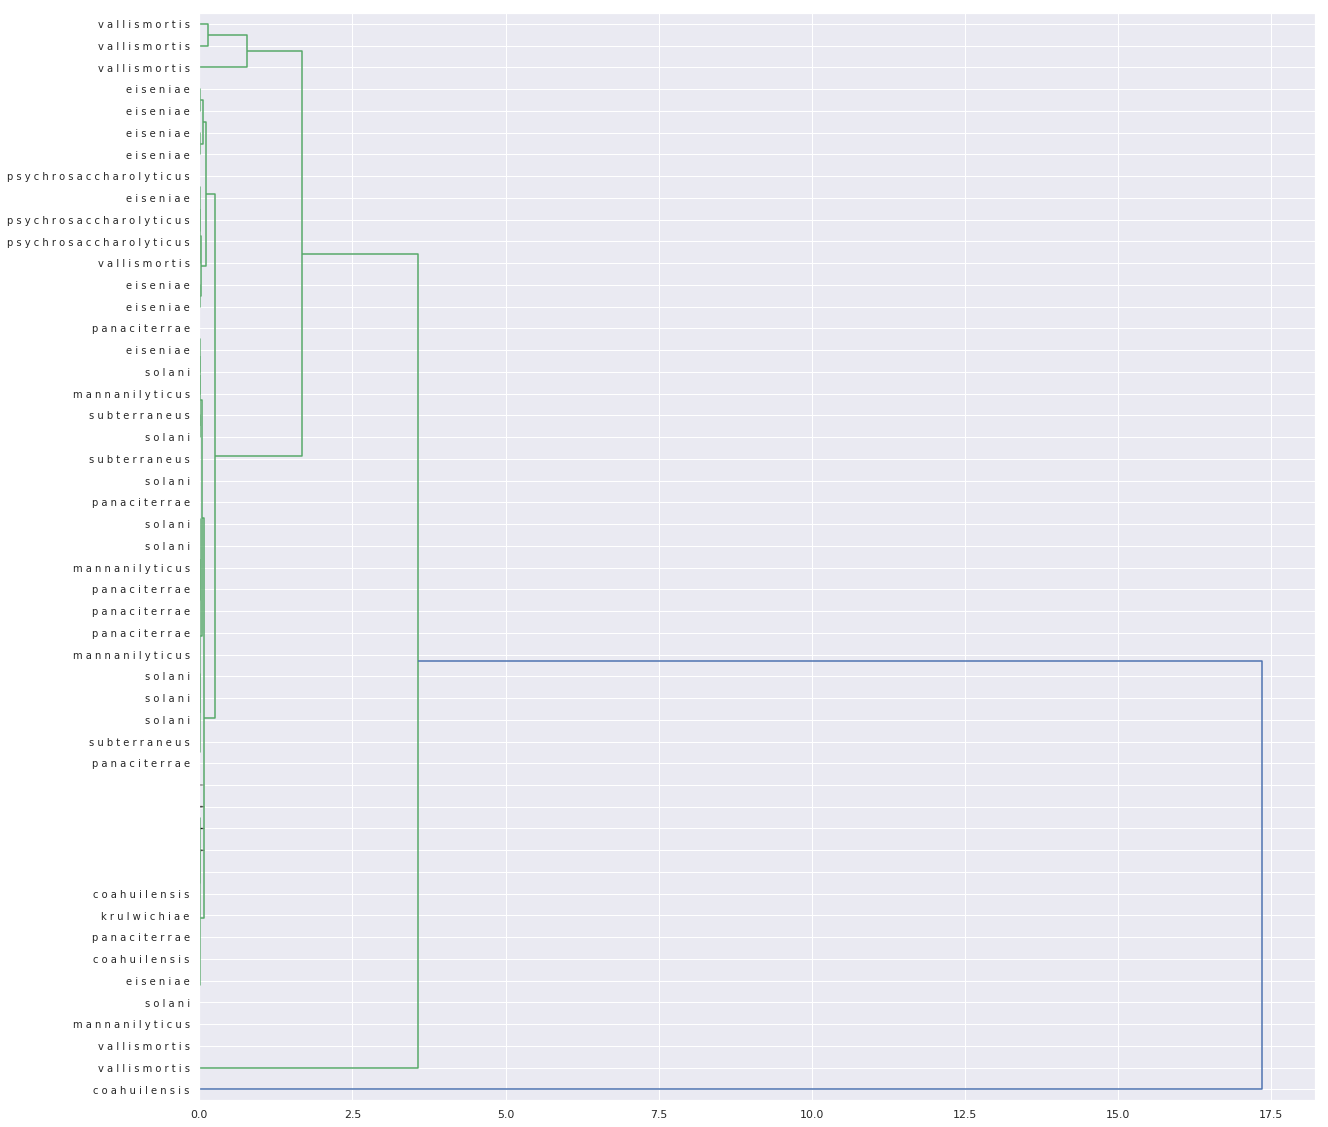

In [38]:
linked = linkage(X_df, method='ward')

plt.figure(figsize=(20, 20))  
htree = dendrogram(linked,  
            orientation='right',
            p=50,
            truncate_mode='lastp',
            leaf_font_size = 10,
            labels=labelList,
            distance_sort='descending',
            show_contracted=True,       
            show_leaf_counts=False)
plt.show()  

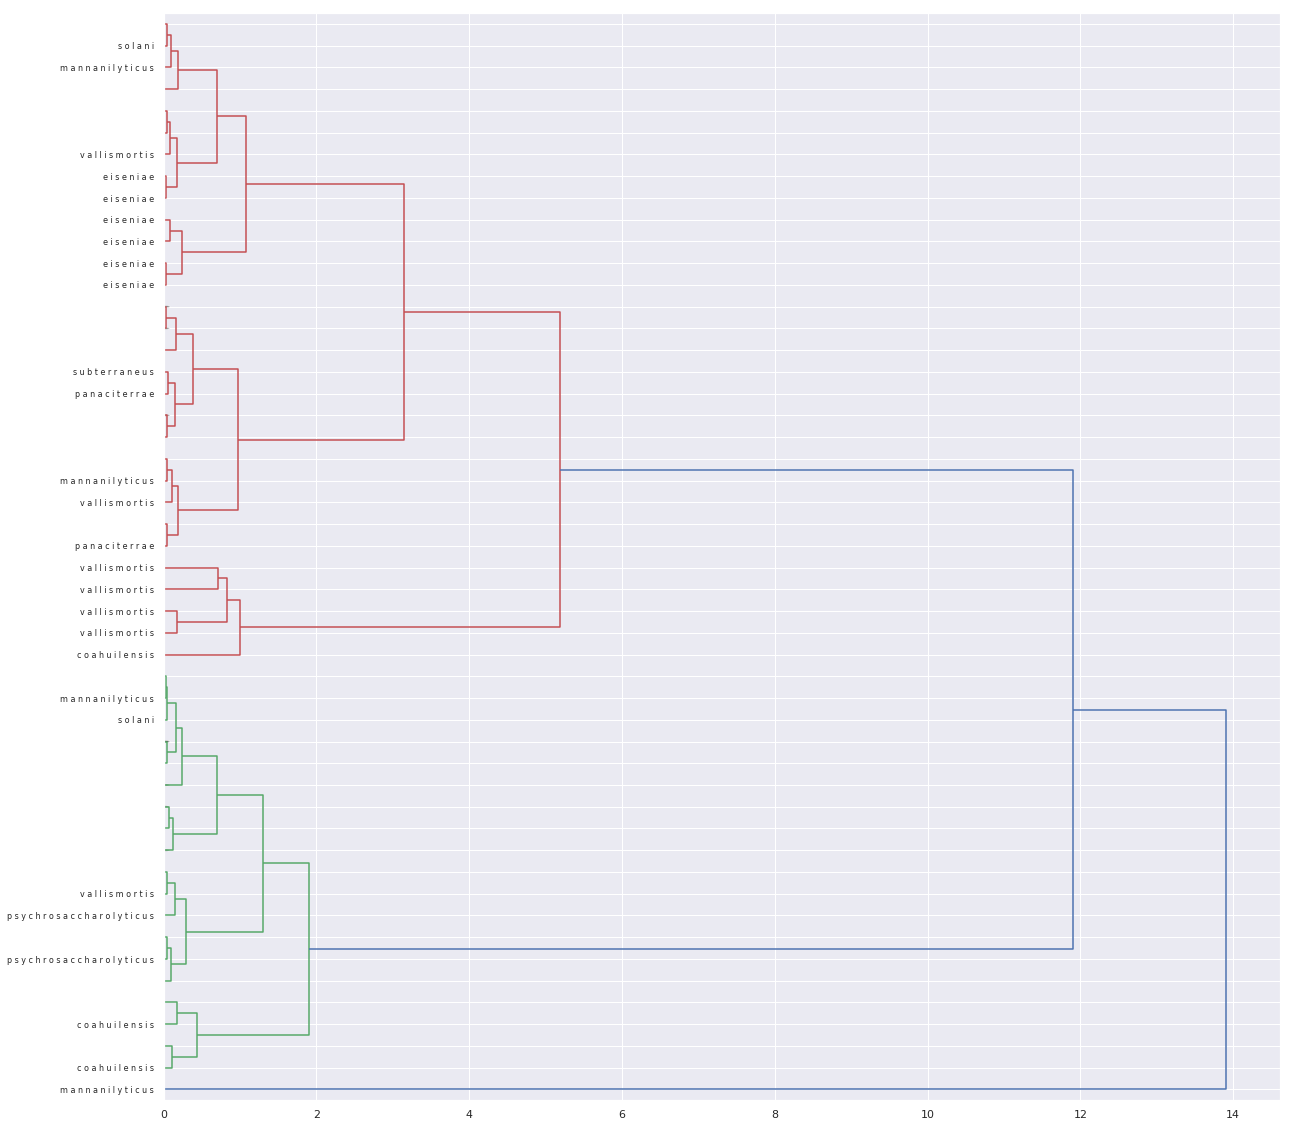

In [44]:
pca = PCA(n_components=10)
pc = pca.fit_transform(X)


plt.figure(figsize=(20, 20))  
htree = dendrogram(linkage(log_scale(pc), method='ward'),  
            orientation='right',
            p=50,
            truncate_mode='lastp',
            leaf_font_size = 8,
            labels=labelList,
            distance_sort='descending',
            show_contracted=True,       
            show_leaf_counts=False)
plt.show()  

In [102]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(log_scale(X))

vocab=list(np.unique(labelList))
y=[vocab.index(x) for x in labelList]

colors = plt.cm.Set1(range(len(vocab)))

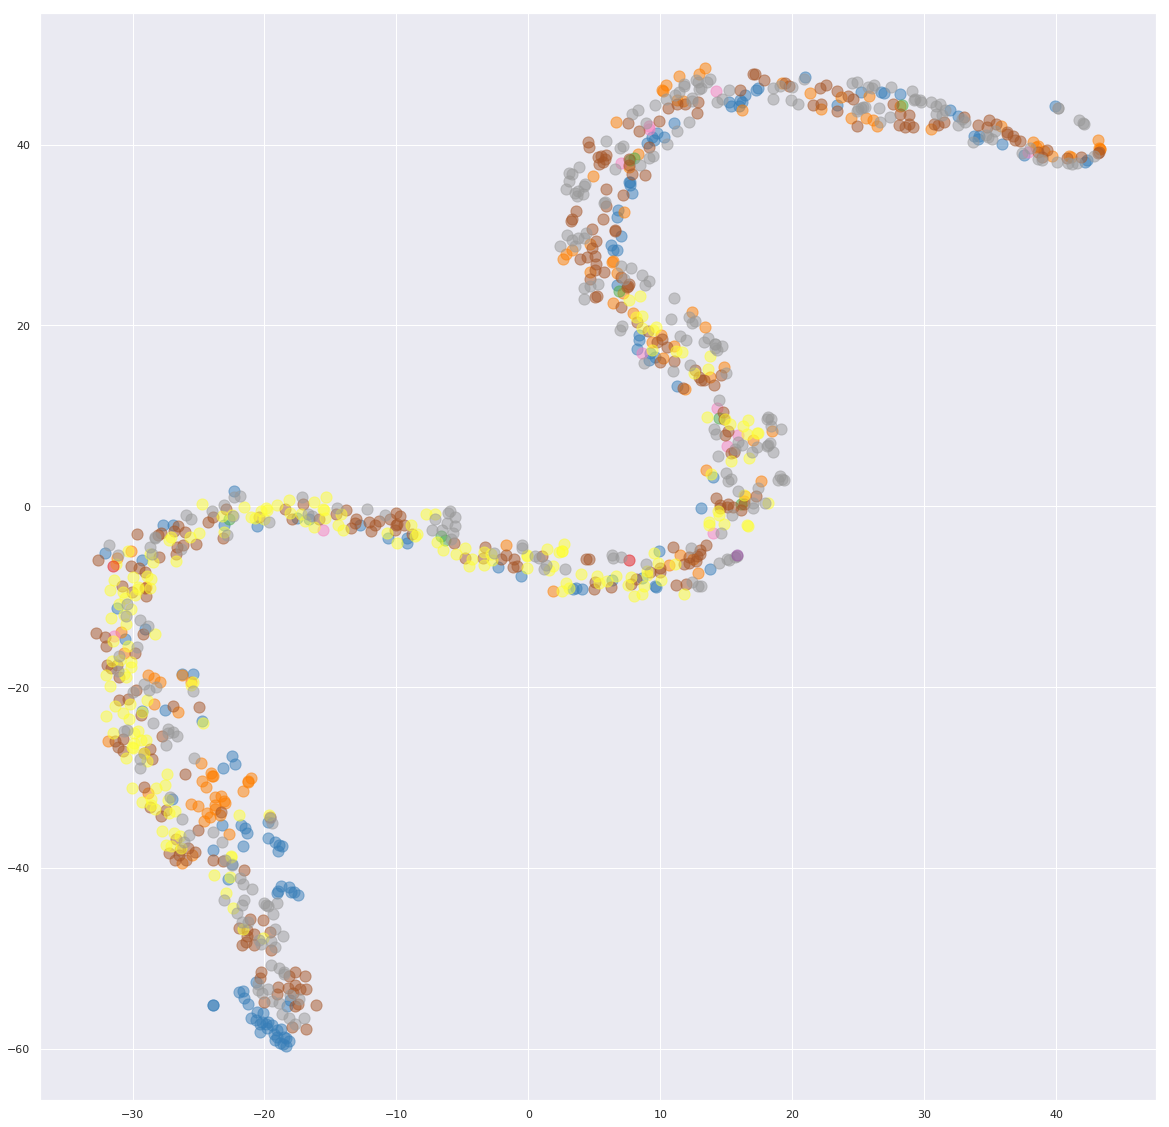

In [150]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
for i in range(X_tsne.shape[0]):    
    plt.scatter(x=X_tsne[i,0],y=X_tsne[i,1],marker=".",s=500,color=colors[y[i]],alpha=.5)
plt.show()

In [174]:
all_fastas = sequence.Dna2VecList.from_folder("/data/genomes/GenSeq_fastas/train").descriptions
all_fastas

